In [82]:
import requests
from bs4 import BeautifulSoup
import lxml
import pandas as pd
import time
import json
import pathlib

In [83]:
session = requests.Session()

In [84]:
session.headers

{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate, br', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [89]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; en-US; rv:76.0) Gecko/20100101 Firefox/76.0'}
session.headers.update(headers)

In [90]:
params_tmccmldm = {
    'fillQuickSearch':'false',
    'target':'advanced',
    'expand':'dl',
    'field1':'AllField',
    'text1':"Text AND Mining OR Clustering OR Classification OR Machine AND Learning OR Data AND Mining",
    'Ppub':"[20170315 TO 20220315]",
    'pageSize':50,
    'startPage':0,
    'rel':'nofollow',
    'ContentItemType':'research-article'
}
params_ha = {'fillQuickSearch':'false',
              'target':'advanced',
              'expand':'dl',
              'field1':'AllField',
              'text1':"Hardware AND Architecture",
              'Ppub':"[20210315 TO 20220315]",
              'pageSize':50,
              'startPage':0,
              'rel':'nofollow',
              'ContentItemType':'research-article'}
params_se = {'fillQuickSearch':'false',
              'target':'advanced',
              'expand':'dl',
              'field1':'AllField',
              'text1':"Software AND Engineering",
              'Ppub':"[20210315 TO 20220315]",
              'pageSize':50,
              'startPage':0,
              'rel':'nofollow',
              'ContentItemType':'research-article'}
params_fl = {'fillQuickSearch':'false',
              'target':'advanced',
              'expand':'dl',
              'field1':'AllField',
              'text1':"Fuzzy AND Logic",
              'Ppub':"[20210315 TO 20220315]",
              'pageSize':50,
              'startPage':0,
              'rel':'nofollow',
              'ContentItemType':'research-article'}
params_sc = {'fillQuickSearch':'false',
              'target':'advanced',
              'expand':'dl',
              'field1':'AllField',
              'text1':"Systems AND Control",
              'Ppub':"[20210315 TO 20220315]",
              'pageSize':50,
              'startPage':0,
              'rel':'nofollow',
              'ContentItemType':'research-article'}
params_db = {'fillQuickSearch':'false',
              'target':'advanced',
              'expand':'dl',
              'field1':'AllField',
              'text1':"Databases",
              'Ppub':"[20210315 TO 20220315]",
              'pageSize':50,
              'startPage':0,
              'rel':'nofollow',
              'ContentItemType':'research-article'}
params_cs = {'fillQuickSearch':'false',
              'target':'advanced',
              'expand':'dl',
              'field1':'AllField',
              'text1':"Computer AND Security",
              'Ppub':"[20210315 TO 20220315]",
              'pageSize':50,
              'startPage':0,
              'rel':'nofollow',
              'ContentItemType':'research-article'}

In [92]:
response = session.get('https://dl.acm.org/action/doSearch', params=params_tmccmldm)

In [93]:
response.status_code

200

In [94]:
response.url

'https://dl.acm.org/action/doSearch?fillQuickSearch=false&target=advanced&expand=dl&field1=AllField&text1=Text+AND+Mining+OR+Clustering+OR+Classification+OR+Machine+AND+Learning+OR+Data+AND+Mining&Ppub=%5B20170315+TO+20220315%5D&pageSize=50&startPage=0&rel=nofollow&ContentItemType=research-article'

In [102]:
def pages_count(params, pages):
    soup = BeautifulSoup(response.text, 'lxml')
    count_articles = int(''.join(soup.select_one('.hitsLength').text.split(','))) // params['pageSize']
    if count_articles < pages:
        pages = count_articles
    return pages

In [96]:
def parse_page(params, page):
    params['startPage'] = page
    response = session.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    titles_links = [[title.text, f"https://dl.acm.org{title.select_one('a')['href']}"] for title in soup.select('.hlFld-Title')]
    return titles_links

In [97]:
def parse_info(url):
    response = session.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    authors = [author.text for author in soup.select('.loa__author-name')]
    meta = soup.select_one('.issue-item__detail a')['title']
    date = soup.select_one('.epub-section__date')
    if date is None:
        date = None
    else:
        date = date.text.strip()
    abstract = soup.select_one('.abstractSection').text.strip()
    return authors, meta, date, abstract

In [103]:
all_articles = {'title': [], 'authors': [], 'date': [], 'source': [], 'abstract': [], 'link': []}
params = [params_tmccmldm, params_ha, params_se, params_fl, params_sc, params_db, params_cs]
for i in range(len(params)):
    pages = pages_count(params[i], 80)
    for page in range(pages):
        titles_links = parse_page(params[i], page)
        for title, link in titles_links:
            authors, meta, date, abstract = parse_info(link)
            all_articles['title'] += [title]
            all_articles['authors'] += [authors]
            all_articles['date'] += [date]
            all_articles['source'] += [meta]
            all_articles['abstract'] += [abstract]
            all_articles['link'] += [link]
            all_articles['label'] += [params[i]['text1']]

NameError: name 'soup' is not defined

In [53]:
data = pd.DataFrame(all_articles)

In [54]:
data.iloc[1968,:]

title                             Text mining with HathiTrust
authors                [Eleanor Dickson Koehl, Ryan Dubnicek]
date                                                June 2019
source      JCDL '19: Proceedings of the 18th Joint Confer...
abstract    This tutorial will introduce attendees to the ...
link           https://dl.acm.org/doi/10.1109/JCDL.2019.00115
Name: 1968, dtype: object

In [55]:
data[:10]

,title,authors,date,source,abstract,link
0,Text mining for incoming tasks based on the ur...,[Yasser Ali Alshehri],March 2020,ICCDA 2020: Proceedings of the 2020 the 4th In...,"In workplaces, there is a massive amount of un...",https://dl.acm.org/doi/10.1145/3388142.3388153
1,Text mining for malware classification using m...,"[Konstantinos F. Xylogiannopoulos, Panagiotis ...",August 2019,ASONAM '19: Proceedings of the 2019 IEEE/ACM I...,Mobile phones have become nowadays a commodity...,https://dl.acm.org/doi/10.1145/3341161.3350841
2,Comparative Study between Traditional Machine ...,"[Cannannore Nidhi Kamath, Syed Saqib Bukhari, ...",August 2018,DocEng '18: Proceedings of the ACM Symposium o...,"In this contemporaneous world, it is an obliga...",https://dl.acm.org/doi/10.1145/3209280.3209526
3,Identification of Overpricing in the Purchase ...,"[Marco Aurelio O. S. Correa, Adriano Galindo L...",August 2018,ICCBDC '18: Proceedings of the 2018 2nd Intern...,Increasing the transparency level in his actio...,https://dl.acm.org/doi/10.1145/3264560.3264569
4,Computational Estimation by Scientific Data Mi...,[Aparna S. Varde],None,ACM Transactions on Knowledge Discovery from Data,Experimental results are often plotted as 2-di...,https://dl.acm.org/doi/10.1145/3502736
5,Where is the road for issue reports classifica...,"[Qiang Fan, Yue Yu, Gang Yin, Tao Wang, Huaimi...",November 2017,ESEM '17: Proceedings of the 11th ACM/IEEE Int...,"Currently, open source projects receive variou...",https://dl.acm.org/doi/10.1109/ESEM.2017.19
6,Feature-based Facebook reviews process model f...,"[Anish Kumar Varudharajulu, Yongsheng Ma]",January 2019,IC4E '19: Proceedings of the 10th Internationa...,The data generated from online communication a...,https://dl.acm.org/doi/10.1145/3306500.3306514
7,Discriminative Topic Mining via Category-Name ...,"[Yu Meng, Jiaxin Huang, Guangyuan Wang, Zihan ...",April 2020,WWW '20: Proceedings of The Web Conference 2020,Mining a set of meaningful and distinctive top...,https://dl.acm.org/doi/10.1145/3366423.3380278
8,Comparative Study of Heart Disease Diagnosis U...,[I. Ketut Agung Enriko],June 2019,ICFET '19: Proceedings of the 5th Internationa...,"Data mining has been used for many purposes, e...",https://dl.acm.org/doi/10.1145/3338188.3338220
9,Text Mining Approach for Identifying Research ...,[Snezhana Sulova],June 2021,CompSysTech '21: Proceedings of the 22nd Inter...,"With the increase of unstructured data, the is...",https://dl.acm.org/doi/10.1145/3472410.3472433


In [69]:
with open('articles.json', 'w', encoding='utf-8') as json_file:
    json.dump(data.to_dict(orient='records'), json_file, ensure_ascii=False, indent=4)

In [64]:
import numpy as np
import pandas as pd
import random
import math
import copy
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from wordcloud import WordCloud
random.seed = 456

In [63]:
!pip install wordcloud

In [7]:
def normalize_keywords_list(list_of_keyword_dicts):
    normalized_list = []
    for keyword_dict in list_of_keyword_dicts:
        total_value = sum(keyword_dict.values())
        normalized_keywords = keyword_dict.copy()
        for keyword in normalized_keywords:
            normalized_keywords[keyword] /= total_value
        normalized_list.append(normalized_keywords)
    return normalized_list

In [73]:
def calculate_tfidf(list_of_keyword_dicts):
    idf_values = dict.fromkeys(list_of_keyword_dicts[0].keys(), 0.0)

    for keyword_dict in list_of_keyword_dicts:
        for word, frequency in filter(lambda x: x[1] > 0, keyword_dict.items()):
            idf_values[word] += 1.0

    for word in idf_values:
        if idf_values[word]:
            idf_values[word] = math.log(len(list_of_keyword_dicts) / idf_values[word])

    tfidf_results = []
    for keyword_dict in list_of_keyword_dicts:
        keyword_dict = keyword_dict.copy()
        total_frequency = sum(keyword_dict.values())
        for word, frequency in filter(lambda x: x[1] > 0, keyword_dict.items()):
            keyword_dict[word] *= idf_values[word] / total_frequency
        tfidf_results.append(keyword_dict)
    return tfidf_results

In [74]:
def normalize_tfidf(list_of_keyword_dicts):
    list_of_keyword_dicts = calculate_tfidf(list_of_keyword_dicts)
    keywords = list_of_keyword_dicts[0].keys()
    normalized_list = []

    for index, value_dict in enumerate(list_of_keyword_dicts):
        norm = 0

        for v in value_dict.values():
            norm += v**2

        norm = math.sqrt(norm)

        if norm == 0:
            normalized_list.append(dict(zip(keywords, value_dict.values())))
            continue

        normalized_values = map(lambda x: x / norm, value_dict.values())
        normalized_list.append(dict(zip(keywords, normalized_values)))

    return normalized_list

In [9]:
def generate_word_cloud(word_frequency_dict, title, axis=None):

    wordcloud = WordCloud(background_color="white", height=500, width=1000, random_state=random.seed)
    wordcloud.generate_from_frequencies(word_frequency_dict)

    if axis is not None:
        axis.imshow(wordcloud, interpolation='bilinear')
        axis.set_title(title)
        axis.axis(False)
    else:
        plt.subplots(num=None, figsize=(15, 10), dpi=80)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis("off")

In [44]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\linag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\linag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\linag\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [11]:
stemmer = SnowballStemmer(language='english')
lemmatizer = nltk.WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))
punctuation = string.punctuation

In [12]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def preprocess_and_stem_nltk(text):
    tokens = word_tokenize(text.lower())
    return [stemmer.stem(word) for word in tokens if word not in stopwords_set and word not in punctuation]

In [14]:
def preprocess_and_lemmatize_nltk(text):
    tokens = word_tokenize(text.lower())
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set and word not in punctuation]

In [15]:
def create_total_bag(results):
    word_frequency_dict = dict()
    for result in results:
        tokens = preprocess_and_lemmatize_nltk(result['abstract'])
        for token in tokens:
            if token not in word_frequency_dict:
                word_frequency_dict[token] = 1
            else:
                word_frequency_dict[token] += 1
    return word_frequency_dict

In [16]:
def update_word_frequency(abstract, word_frequency_dict):
    tokens = preprocess_and_lemmatize_nltk(abstract)
    for token in tokens:
        if token in word_frequency_dict:
            word_frequency_dict[token] += 1
    return word_frequency_dict

In [17]:
def remove_low_frequency_words(word_frequency_dict, threshold=0):
    filtered_dict = dict()
    for word, frequency in word_frequency_dict.items():
        if frequency > threshold:
            filtered_dict[word] = frequency
    return filtered_dict

In [18]:
def generate_list_keywords(word_frequency_dict, articles):
    list_keywords = []
    temp_bag = dict.fromkeys(word_frequency_dict, 0)
    for article in articles:
        list_keywords.append(update_word_frequency(article['abstract'], temp_bag.copy()))
    del temp_bag
    return list_keywords

In [19]:
def extract_list_keywords_weights(list_of_keyword_weights):
    list_keywords_weight_items = []
    for item in list_of_keyword_weights:
        list_keywords_weight_items.append(list(item.values()))
    return list_keywords_weight_items

In [20]:
def binary_precision_positive_class(y_true, y_pred):
    return precision_score(y_true, y_pred, pos_label=0)

def binary_recall_positive_class(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=0)

def binary_f1_positive_class(y_true, y_pred):
    return f1_score(y_true, y_pred, pos_label=0)

In [21]:
precision_binary_positive = make_scorer(binary_precision_positive_class, greater_is_better=True)
recall_binary_positive = make_scorer(binary_recall_positive_class, greater_is_better=True)
f1_binary_positive = make_scorer(binary_f1_positive_class, greater_is_better=True)

In [22]:
def evaluate_classifier(model, X_train, y_train, X_test=None, y_test=None):
    cross_validator = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    scoring_metrics = {'accuracy': 'accuracy', 'precision_binary_positive': precision_binary_positive, 'recall_binary_positive': recall_binary_positive, 'f1_binary_positive': f1_binary_positive}
    scores = cross_validate(model, X_train, y_train, cv=cross_validator, return_estimator=True, scoring=scoring_metrics)
    return cross_validator, scores

In [23]:
def plot_classifier_roc(list_of_cross_validators, list_of_scores, x_train, y_train, x_test=None, y_test=None):

    list_num_best_models = []
    for i in range(len(list_of_scores)):
        list_num_best_models.append(list_of_scores[i]['test_f1_binary_positive'].argmax())

    best_models = []
    for i in range(len(list_of_scores)):
        best_models.append(list_of_scores[i]['estimator'][list_num_best_models[i]])

    list_x_test = []
    list_y_test = []
    for j in range(len(list_num_best_models)):
        if x_test is None and y_test is None:
            _, test_num = list(list_of_cross_validators[j].split(x_train, y_train))[list_num_best_models[j]]
            x_test, y_test = [], []
            for i in test_num:
                x_test.append(x_train[i])
                y_test.append(y_train[i])
            list_x_test.append(x_test)
            list_y_test.append(y_test)
            x_test = None
            y_test = None

    list_y_proba = []
    for i in range(len(best_models)):
        list_y_proba.append(best_models[i].predict_proba(list_x_test[i])[:, 1])

    list_fpr = [0] * len(list_y_proba)
    list_tpr = [0] * len(list_y_proba)
    for i in range(len(list_y_proba)):
        list_fpr[i], list_tpr[i], _ = roc_curve(list_y_test[i], list_y_proba[i])

    plt.figure(figsize=(15, 10))
    lw = 2
    for i in range(len(list_tpr)):
        plt.plot(
            list_fpr[i],
            list_tpr[i],
            lw=lw,
            label=f'{str(best_models[i]).split("(")[0]}\nAUC = {round(roc_auc_score(list_y_test[i], list_y_proba[i]), 5)}'
        )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [24]:
with open('articles.json','r') as json_file:
    pre_results = json.load(json_file)

In [25]:
len(pre_results)

2000

In [26]:
pre_results

[{'title': 'Text mining for incoming tasks based on the urgency/importance factors and task classification using machine learning tools',
  'authors': ['Yasser Ali Alshehri'],
  'date': 'March 2020',
  'source': 'ICCDA 2020: Proceedings of the 2020 the 4th International Conference on Compute and Data Analysis',
  'abstract': 'In workplaces, there is a massive amount of unstructured data from different sources. In this paper, we present a case study that explains how can through communications between employees, we can help to prioritize tasks requests to increase the efficiency of their works for both technical and non-technical workers. This involves managing daily incoming tasks based on their level of urgency and importance.To allow all workers to utilize the urgency-importance matrix as a time-management tool, we need to automate this tool. The textual content of incoming tasks are analyzed, and metrics related to urgency and importance are extracted. A third factor (i.e., the resp

In [27]:
data_results = pd.DataFrame(pre_results)

In [40]:
sum(data_results.link.value_counts() == 2)

0

In [16]:
pre_results[0]

{'title': 'Text mining for incoming tasks based on the urgency/importance factors and task classification using machine learning tools',
 'authors': ['Yasser Ali Alshehri'],
 'date': 'March 2020',
 'source': 'ICCDA 2020: Proceedings of the 2020 the 4th International Conference on Compute and Data Analysis',
 'abstract': 'In workplaces, there is a massive amount of unstructured data from different sources. In this paper, we present a case study that explains how can through communications between employees, we can help to prioritize tasks requests to increase the efficiency of their works for both technical and non-technical workers. This involves managing daily incoming tasks based on their level of urgency and importance.To allow all workers to utilize the urgency-importance matrix as a time-management tool, we need to automate this tool. The textual content of incoming tasks are analyzed, and metrics related to urgency and importance are extracted. A third factor (i.e., the response 

In [45]:
bag_words = create_total_bag(pre_results)

In [46]:
s_words = pd.Series(bag_words, index = bag_words.keys())

In [53]:
bag_words

{'workplace': 40,
 'massive': 240,
 'amount': 320,
 'unstructured': 320,
 'data': 4960,
 'different': 920,
 'source': 400,
 'paper': 1040,
 'present': 520,
 'case': 880,
 'study': 800,
 'explains': 40,
 'communication': 120,
 'employee': 40,
 'help': 280,
 'prioritize': 40,
 'task': 840,
 'request': 40,
 'increase': 120,
 'efficiency': 240,
 'work': 720,
 'technical': 120,
 'non-technical': 40,
 'worker': 80,
 'involves': 80,
 'managing': 80,
 'daily': 80,
 'incoming': 120,
 'based': 1400,
 'level': 600,
 'urgency': 120,
 'importance.to': 40,
 'allow': 200,
 'utilize': 40,
 'urgency-importance': 40,
 'matrix': 40,
 'time-management': 40,
 'tool': 360,
 'need': 600,
 'automate': 80,
 'textual': 240,
 'content': 440,
 'analyzed': 120,
 'metric': 120,
 'related': 240,
 'importance': 120,
 'extracted': 240,
 'third': 80,
 'factor': 160,
 'i.e.': 200,
 'response': 80,
 'variable': 200,
 'defined': 80,
 'two': 400,
 'input': 200,
 'machine': 920,
 'learning': 1680,
 'applied': 360,
 'predict

In [56]:
sum(s_words == 1)

0

In [57]:
len(s_words)

1820

In [67]:
s_words.sort_values(ascending=False)/s_words.sum()

data              0.022443
mining            0.012308
classification    0.011765
text              0.011403
method            0.010317
                    ...   
unfiltered        0.000181
utterance         0.000181
likelihood        0.000181
output            0.000181
boost             0.000181
Length: 1820, dtype: float64

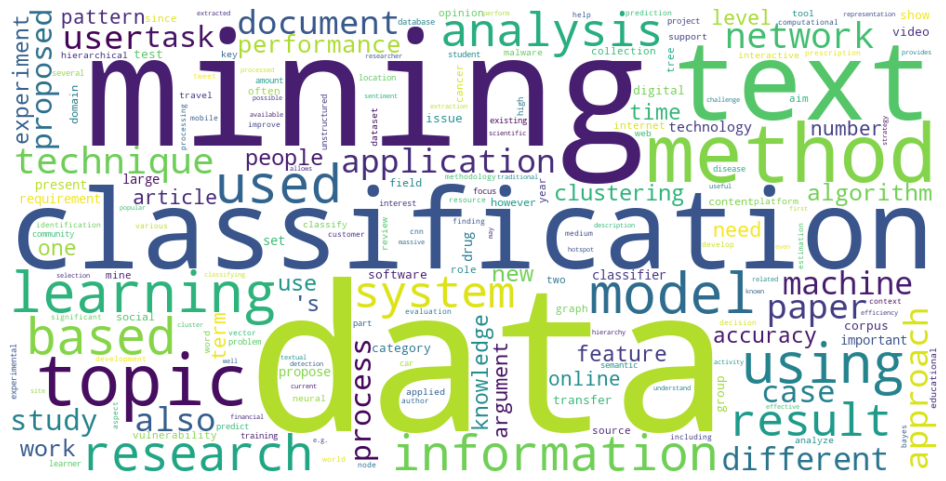

In [68]:
generate_word_cloud(bag_words,'')

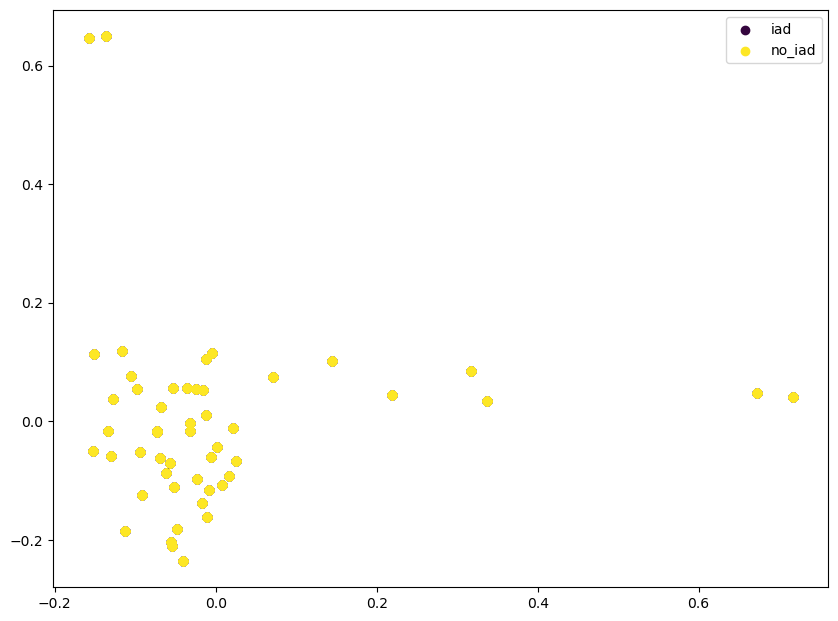